In [3]:
import os
import cv2
import glob
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from lib.fractal_parser import FractalParser

In [44]:
fractal_parser = FractalParser()
fractal_dimensions = []
image_dir = '/Volumes/Extreme 900/kozawa-drawings'
max_box_size = 100
min_box__size = 10
image_files = glob.glob(image_dir+'/8*')
for image_file in tqdm(image_files):
    try:
        fractal_dimension = fractal_parser.get_fractal_dimension(
            image_file = image_file,
            max_box_size = 100,
            min_box_size = 10,
            show_figures = False
        )
        fractal_dimensions.append(fractal_dimension)
    except:
        print(image_file)
image_files = glob.glob(image_dir+'/9*')
for image_file in tqdm(image_files):
    try:
        fractal_dimension = fractal_parser.get_fractal_dimension(
            image_file = image_file,
            max_box_size = 100,
            min_box_size = 10,
            show_figures = False
        )
        fractal_dimensions.append(fractal_dimension)
    except:
        print(image_file)
image_files = glob.glob(image_dir+'/1*')
for image_file in tqdm(image_files):
    try:
        fractal_dimension = fractal_parser.get_fractal_dimension(
            image_file = image_file,
            max_box_size = 100,
            min_box_size = 5,
            show_figures = False
        )
        fractal_dimensions.append(fractal_dimension)
    except:
        print(image_file)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


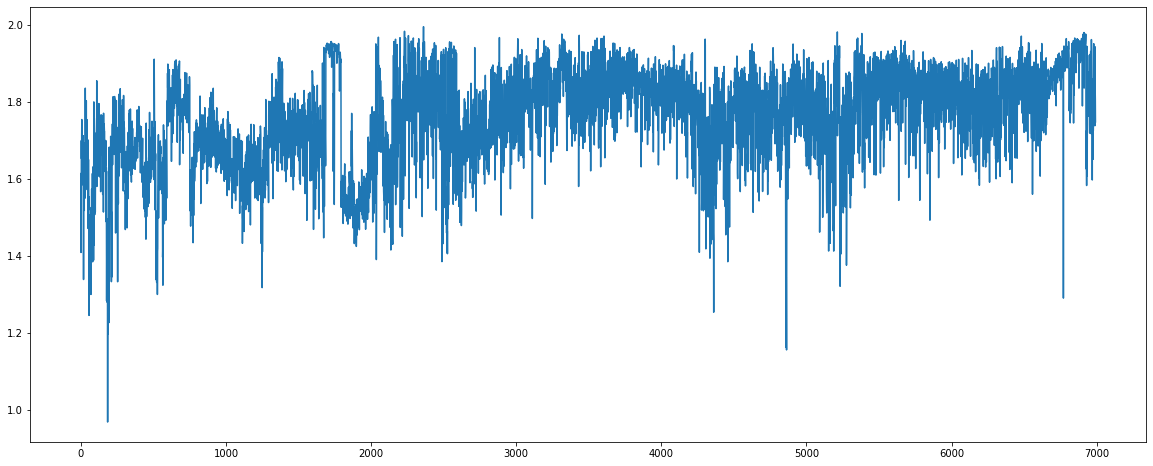

In [19]:
plt.figure(figsize=(20,8))
plt.plot(fractal_dimensions)

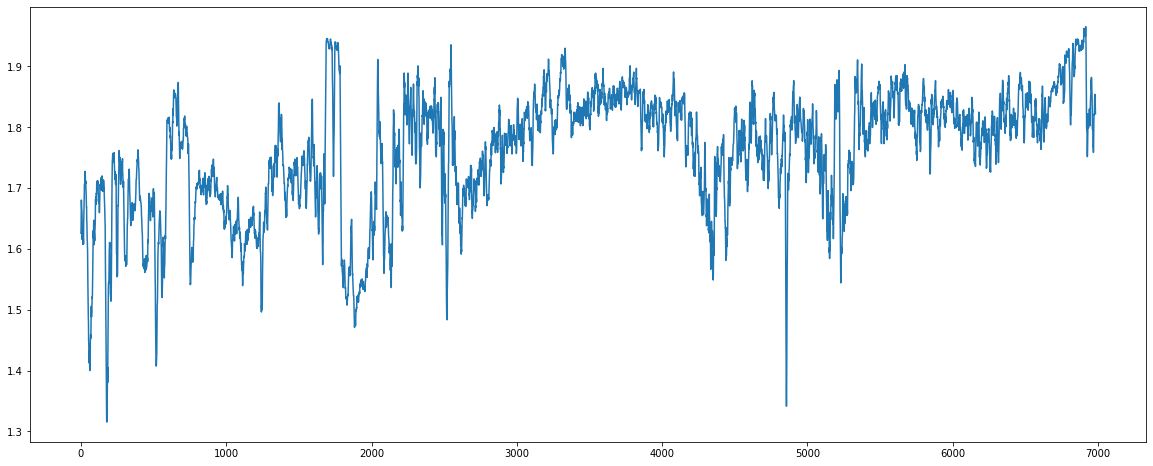

In [43]:
fractal_dimensions_array = np.array(fractal_dimensions)
save_path = 'fracrtal-dimensions-{}-{}.npy'.format(max_box_size, min_box__size)
np.save(save_path, fractal_dimensions_array)
fractal_dimensions_array = np.load(save_path)
num = 10
convolved_fractal_dimensions_array =np.convolve(
    fractal_dimensions_array, 
    np.ones(num)/num,
#     [0.1, 0.15, 0.5, 0.15, 0.1],
    mode='valid'
)
plt.figure(figsize=(20,8))
plt.plot(convolved_fractal_dimensions_array)